In [305]:
# Load the Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import re
from statsmodels.graphics.mosaicplot import mosaic
# Magic command for Jupyter
%matplotlib inline
#Load the data
Audible_final = pd.read_csv('Audible_final.csv')
# Find null values and eliminate
np.sum(Audible_final.isnull())
#print np.sum(np.sum(Audible_final.isnull()))
Audible_final = Audible_final.dropna(axis=0, how='any')
np.sum(Audible_final.isnull())
#print np.sum(np.sum(Audible_final.isnull()))
# Convert Release Date to Datetime format
Audible_final['RelDate'] = pd.to_datetime(Audible_final['RelDate'])
# Remove the $ from the prices
Audible_final['Price'].replace('\$','', regex=True, inplace=True)
# If there is a sale price lised take the regular price
def take_reg_price(string):
    #If two prices are lised take the first(regular) price
    # Look for hours and minutes and set variables
    if re.search('(\d+\.\d+),\d+\.\d',string):
        reg_price = re.search('(\d+\.\d+),\d+\.\d',string).group(1)
        return reg_price
    else:
        return string
Audible_final['Price'] = Audible_final['Price'].map(lambda x: take_reg_price(x))
# Now make the Price column a float
Audible_final['Price'] = Audible_final['Price'].map(lambda x: float(x))
# Remove the pre-releases
Scrape_Date = pd.to_datetime('2017-02-08')
PreReleases = Audible_final[Audible_final['RelDate'] >= Scrape_Date]
Audible_final = Audible_final[Audible_final['RelDate'] < Scrape_Date]
# Remove the released audiobooks with the length Not Yet Known 
Audible_final = Audible_final[Audible_final['Length'] != 'Not Yet Known']
# Convert the length column from a string of hours and minutes to an int in minutes
def hours_to_min(string):
    # Convert a column of hours and min to an int in min
    # Look for hours and minutes and set variables
    if re.search('(\d+) hrs',string):
        hour = re.search('(\d+) hrs',string).group(1)
    if re.search('(\d+) min', string):
        minute = re.search('(\d+) min', string).group(1)
    # Convert hour to minutes and add to minutes if found
    if re.search('(\d+) hrs',string) and re.search('(\d+) min', string):
        mins = (float(hour)*60) + float(minute)
    elif re.search('(\d+) hrs',string) :
        mins = float(hour)*60
    elif re.search('(\d+) min', string):
        mins = float(minute)
    else:
        mins = 60.0
    return mins
Audible_final['Length'] = Audible_final['Length'].map(lambda x: hours_to_min(x))
# Split the Dataframe into Unreviewed and Reviewed dataframes
Zero_Reviews = Audible_final[Audible_final['OverallRating'] == 0]
Reviewed_books = Audible_final[Audible_final['OverallRating'] != 0]

42733
157950
153577
153115


(<matplotlib.figure.Figure at 0x126f1ee90>,
 OrderedDict([(('Unreviewed Books',), (0.0, 0.0, 0.082979015190957989, 1.0)), (('No Performace Rating',), (0.087905123565342219, 0.0, 0.29821609098312207, 1.0)), (('No Story Rating',), (0.39104732292284855, 0.0, 0.29731897856372203, 1.0)), (('Reviewed Books',), (0.69329240986095486, 0.0, 0.30670759013904508, 1.0))]))

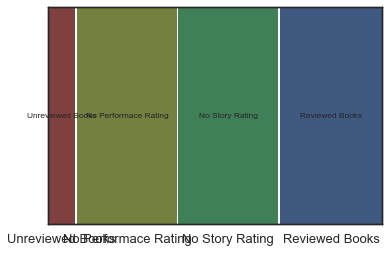

In [309]:
print len(Zero_Reviews)
print len(Reviewed_books)
Reviewed_P = Reviewed_books[Reviewed_books['PerformRating'] != 0]
Reviewed_P_S = Reviewed_P[Reviewed_P['StoryRating'] != 0]
print len(Reviewed_P)
print len(Reviewed_P_S)


In [278]:
# Numerical Variables
# OverallRating
# StoryRating
# PerformRating
# NumOverRating
# NumStoryRating
# NumPerformRating
# Length
# Price

# Datetime variable
# RelDate

# Catagorical Variables 
# Title
# Catagory
# NarratedBy
# Publisher
# WrittenBy
# CompOrAb

OverallRating    4.024324
StoryRating      4.055223
PerformRating    4.135720
dtype: float64


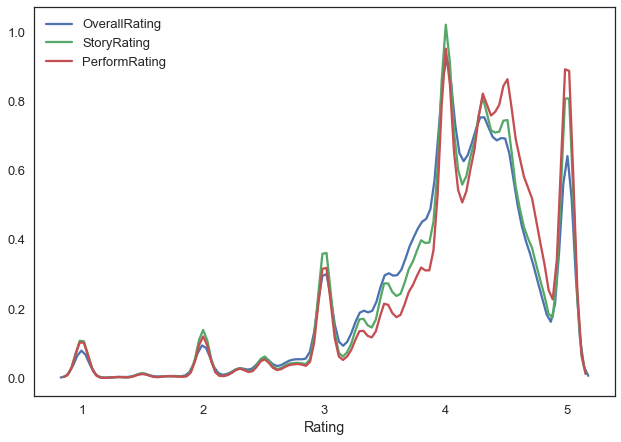

In [279]:
# Plots to characterize the data
# Histogram plots of numerical varibales
sns.set('talk')
sns.set_style('white')
df = Reviewed_P_S[['OverallRating','StoryRating','PerformRating']]
print np.mean(df)
sns.distplot(df['OverallRating'], hist=False, label='OverallRating')
sns.distplot(df['StoryRating'], hist=False, label='StoryRating')
sns.distplot(df['PerformRating'], hist=False, label='PerformRating', axlabel='Rating')
plt.legend();

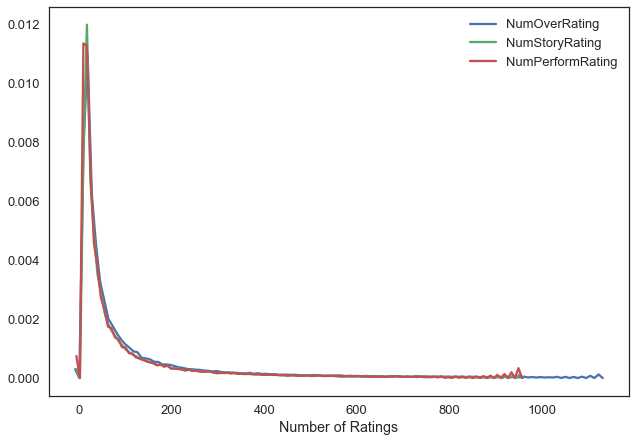

In [280]:
df = Reviewed_P_S[['NumOverRating','NumStoryRating','NumPerformRating']]
sns.set('talk')
sns.set_style('white')
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 1).all(axis=1)]
sns.distplot(df['NumOverRating'], hist=False, label='NumOverRating')
sns.distplot(df['NumStoryRating'], hist=False, label='NumStoryRating')
sns.distplot(df['NumPerformRating'], hist=False, label='NumPerformRating', axlabel='Number of Ratings')
plt.legend();

Length    438.794411
dtype: float64


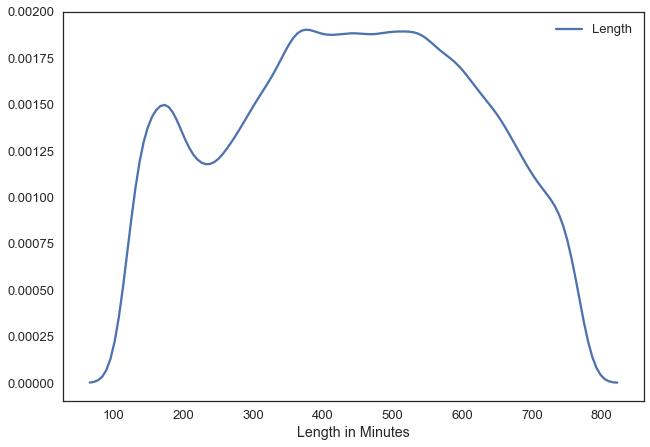

In [281]:
df = Reviewed_P_S[['Length']]
sns.set('talk')
sns.set_style('white')
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 1).all(axis=1)]
print np.mean(df)
sns.distplot(df['Length'], hist=False, label='Length', axlabel='Length in Minutes')
plt.legend()


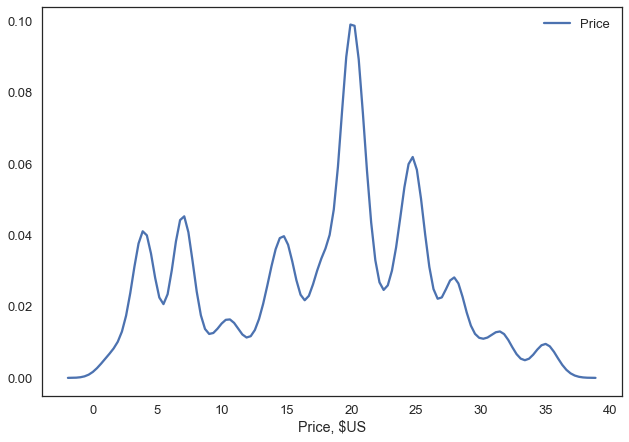

In [282]:
df = Reviewed_P_S[['Price']]
sns.set('talk')
sns.set_style('white')
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
sns.distplot(df['Price'], hist=False, label='Price', axlabel='Price, $US')
plt.legend();

/Users/gafergus/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


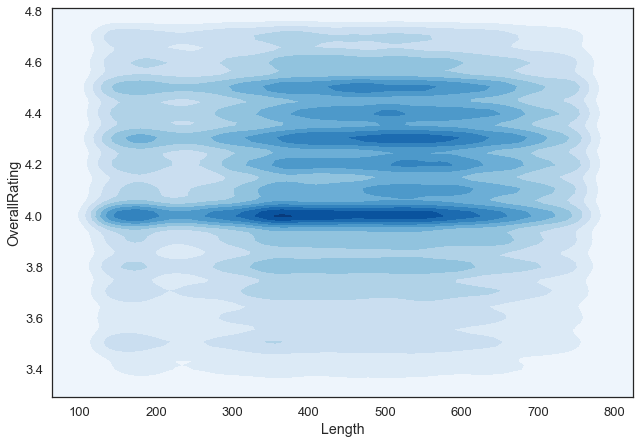

In [283]:
df = Reviewed_P_S[['Length','OverallRating']]
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 1).all(axis=1)]
sns.kdeplot(df['Length'],df['OverallRating'], shade=True, cmap="Blues")
plt.legend()

OverallRating    4.173269
dtype: float64


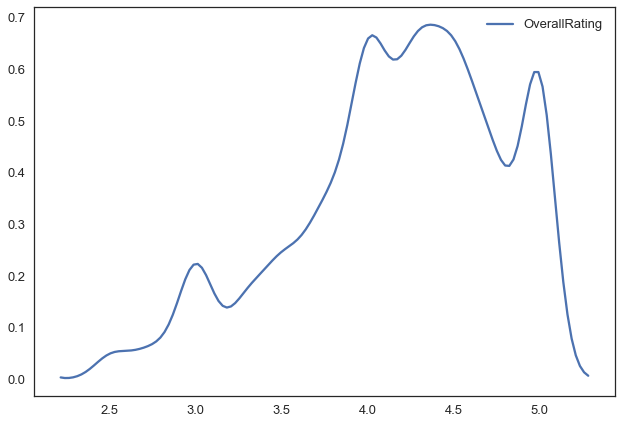

In [284]:
df = Reviewed_P_S[Reviewed_P_S['WrittenBy']==Reviewed_P_S['NarratedBy']]
df = df[['OverallRating']]
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
print np.mean(df)
sns.kdeplot(df['OverallRating'], shade=False)
plt.legend()

In [285]:
from scipy import stats

df = Reviewed_P_S[['OverallRating']]
df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
print np.mean(df), np.std(df), len(df)

df1 = Reviewed_P_S[Reviewed_P_S['WrittenBy']==Reviewed_P_S['NarratedBy']]
df1 = df1[['OverallRating']]
df1 = df1[df1.apply(lambda x: np.abs(x - x.mean()) / x.std() < 2).all(axis=1)]
print np.mean(df1), np.std(df1), len(df1)
stats.ttest_ind_from_stats(np.mean(df),np.std(df),len(df), np.mean(df1),np.std(df1),len(df1))

OverallRating    4.122107
dtype: float64 OverallRating    0.544934
dtype: float64 146590
OverallRating    4.173269
dtype: float64 OverallRating    0.602115
dtype: float64 12981


Ttest_indResult(statistic=OverallRating   -10.161571
dtype: float64, pvalue=array([  2.99347897e-24]))

In [286]:
# Find cases where the Performace rating and the Overall rating are different, Performance higher
df = Reviewed_P_S[(Reviewed_P_S['PerformRating'] > np.mean(Reviewed_P_S['PerformRating'])) &\
                  (Reviewed_P_S['OverallRating'] < 0.9*np.mean(Reviewed_P_S['OverallRating'])) &\
                  (Reviewed_P_S['NumPerformRating'] > 5)]

df = df[['PerformRating','OverallRating','StoryRating']]
print len(df)
print df.corr()
#sns.jointplot(df['OverallRating'],df['PerformRating'])

826
               PerformRating  OverallRating  StoryRating
PerformRating       1.000000       0.040579     0.166083
OverallRating       0.040579       1.000000     0.122137
StoryRating         0.166083       0.122137     1.000000


In [287]:
# Find cases where the Performace rating and the Overall rating are different, Overall Higher 
df = Reviewed_P_S[(Reviewed_P_S['PerformRating'] < 0.9*np.mean(Reviewed_P_S['PerformRating'])) &\
                  (Reviewed_P_S['OverallRating'] > np.mean(Reviewed_P_S['OverallRating'])) &\
                  (Reviewed_P_S['NumPerformRating'] > 5)]

df = df[['PerformRating','OverallRating','StoryRating']]
print len(df)
print df.corr()
#sns.jointplot(df['OverallRating'],df['StoryRating'])

561
               PerformRating  OverallRating  StoryRating
PerformRating       1.000000      -0.061420    -0.149042
OverallRating      -0.061420       1.000000     0.441826
StoryRating        -0.149042       0.441826     1.000000


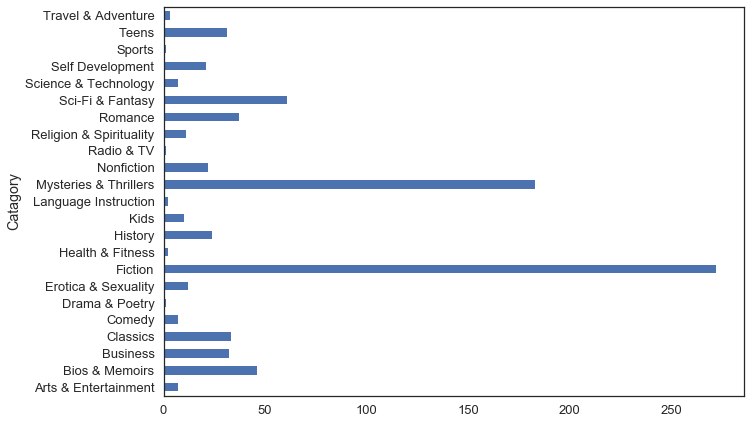

In [288]:
# Performace rating higher
df = Reviewed_P_S[(Reviewed_P_S['PerformRating'] > np.mean(Reviewed_P_S['PerformRating'])) &\
                  (Reviewed_P_S['OverallRating'] < 0.9*np.mean(Reviewed_P_S['OverallRating'])) &\
                  (Reviewed_P_S['NumPerformRating'] > 5)]
df.groupby('Catagory')['Title'].agg('count').plot.barh()

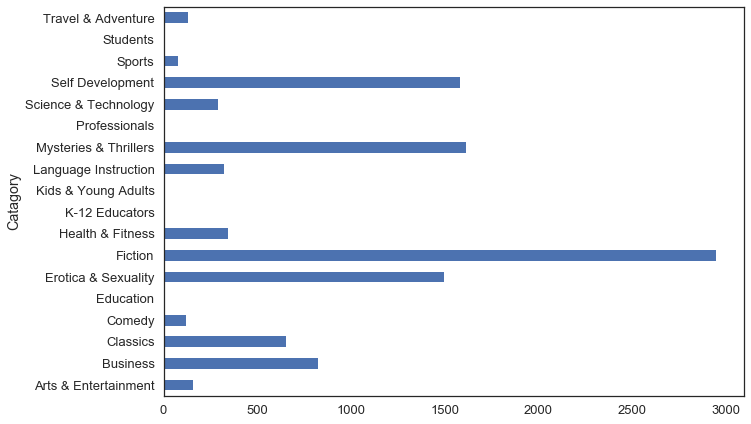

In [289]:
# Explore the effect of average rating on Catagory
mean_cat_df = Reviewed_P_S.groupby('Catagory')[['OverallRating']].agg('mean')
mean_cat_df.reset_index(level=0, inplace=True)
MC = pd.merge(Reviewed_P_S, mean_cat_df, on='Catagory', how='left')
MC = MC[MC['PerformRating'] > 1.25*MC['OverallRating_y']]
MC.groupby('Catagory')['Title'].agg('count').plot.barh()

In [312]:
from collections import Counter
df = Reviewed_P_S.groupby(['NarratedBy', 'Catagory'])['Title'].agg('count')
tup_list = []
for tup in df.index:
    tup_list += [tup]

dict_num_cats = Counter(elem[0] for elem in tup_list)

dictlist = []
for key, value in dict_num_cats.iteritems():
    temp = [value]
    dictlist.append(temp)

#print np.mean(dictlist)
#print stats.mode(dictlist)
#print np.percentile(dictlist, 25)
#print np.percentile(dictlist, 90)

               OverallRating  StoryRating  PerformRating
OverallRating       1.000000     0.789232       0.750065
StoryRating         0.789232     1.000000       0.673062
PerformRating       0.750065     0.673062       1.000000


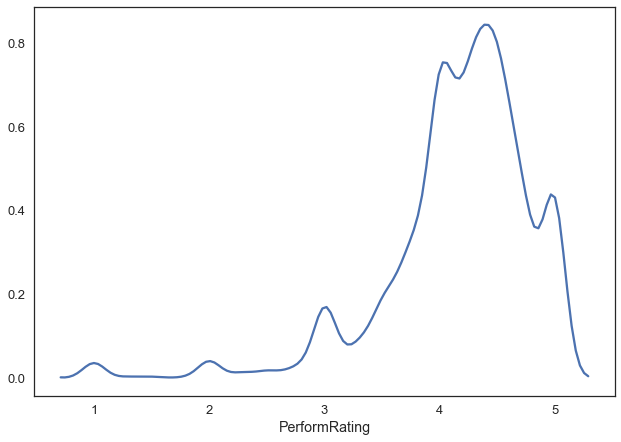

In [291]:
df = Reviewed_P_S[['Title','NarratedBy','OverallRating','StoryRating','PerformRating']]
a = df['Title'].value_counts()
a = pd.DataFrame(a)
a.reset_index(level=0, inplace=True)
a = a.rename(columns = {'index':'Title','Title':'Title Count'})
df = pd.merge(df,a, on='Title', how='left')
df = df[df['Title Count'] > 4]
df.sort_values(by='Title',inplace=True)
df = df[['Title','NarratedBy','OverallRating','StoryRating','PerformRating']]
sns.distplot(df['PerformRating'], hist=False)
#df
print df.corr()
#len(df)
#sns.jointplot(df['OverallRating'],df['PerformRating'])
#sns.jointplot(df['OverallRating'],df['StoryRating'])

In [313]:
df = Reviewed_P_S[['Title','NarratedBy','OverallRating','StoryRating','PerformRating']]
a = df['Title'].value_counts()
a = pd.DataFrame(a)
a.reset_index(level=0, inplace=True)
a = a.rename(columns = {'index':'Title','Title':'Title Count'})
df = pd.merge(df,a, on='Title', how='left')
df = df[df['Title Count'] > 20]
df.sort_values(by='Title',inplace=True)
df = df[['Title','NarratedBy','OverallRating','StoryRating','PerformRating']]
print len(df)
print df.corr('spearman')
df
#len(df)
#sns.jointplot(df['OverallRating'],df['PerformRating'])
#sns.jointplot(df['OverallRating'],df['StoryRating'])

158
               OverallRating  StoryRating  PerformRating
OverallRating       1.000000     0.697209       0.762661
StoryRating         0.697209     1.000000       0.701412
PerformRating       0.762661     0.701412       1.000000


,Title,NarratedBy,OverallRating,StoryRating,PerformRating
152551,Great Expectations,Simon Prebble,4.5,4.5,4.7
103309,Great Expectations,Tadhg Hynes,4.2,4.1,4.4
52423,Great Expectations,Gene Engene,4.0,4.0,3.8
21174,Great Expectations,Anton Lesser,4.7,4.6,4.8
20226,Great Expectations,Martin Jarvis,4.6,4.6,4.8
16958,Great Expectations,Gildart Jackson,4.3,4.3,4.6
73697,Great Expectations,Martin Jarvis,2.0,2.0,3.0
32798,Great Expectations,David Ian Davies,3.7,4.3,3.9
34442,Great Expectations,Michael Page,4.6,4.7,4.7
24826,Great Expectations,John Lee,4.3,4.9,4.5


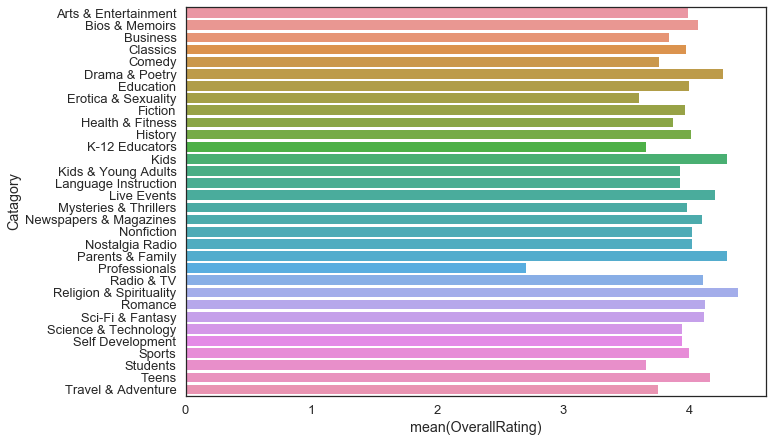

In [293]:
df = Reviewed_P_S[['Catagory','OverallRating','StoryRating','PerformRating']]
df = df.groupby('Catagory').agg('mean')
df = df.reset_index(level=0)
df
sns.barplot(y="Catagory",x='OverallRating',data=df)


In [294]:
# Effect of genre on 
#fig = plt.figure(figsize=(8,20))
#ddf = pd.melt(df, id_vars='Catagory')
#sns.barplot(y="Catagory",x='value',hue='variable', data=ddf)

,OverallRating,PerformRating
OverallRating,1.000000,0.814182
PerformRating,0.814182,1.000000


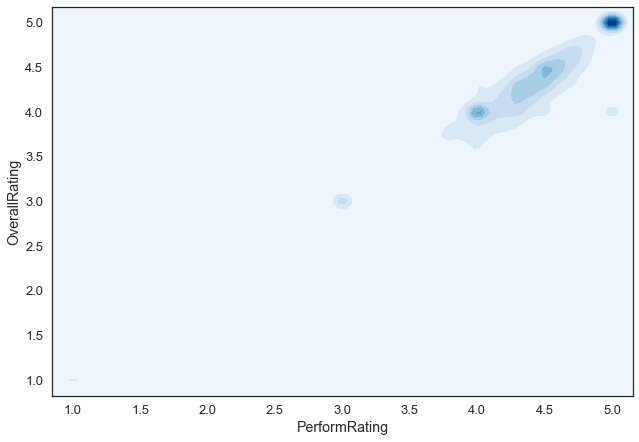

In [295]:
df = Reviewed_P_S[['OverallRating', 'PerformRating']]
sns.kdeplot(df['PerformRating'],df['OverallRating'], shade=True, cmap="Blues")
df.corr()

,OverallRating,StoryRating
OverallRating,1.000000,0.886631
StoryRating,0.886631,1.000000


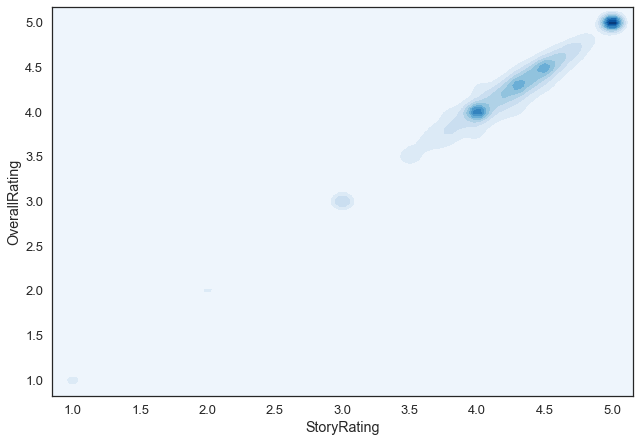

In [296]:
df = Reviewed_P_S[['OverallRating', 'StoryRating']]
sns.kdeplot(df['StoryRating'],df['OverallRating'], shade=True, cmap="Blues")
df.corr()

,PerformRating,StoryRating
PerformRating,1.000000,0.784428
StoryRating,0.784428,1.000000


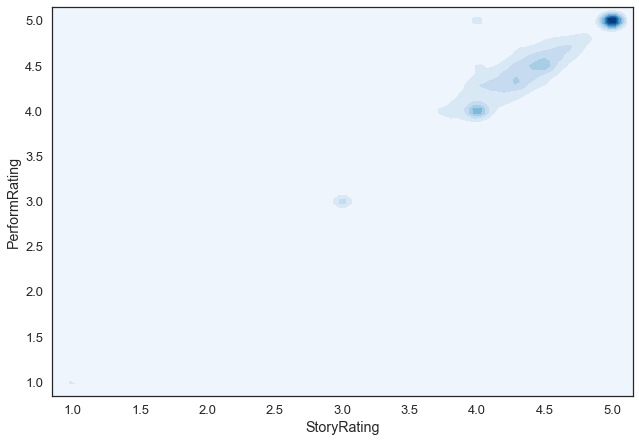

In [297]:
df = Reviewed_P_S[['PerformRating', 'StoryRating']]
sns.kdeplot(df['StoryRating'],df['PerformRating'], shade=True, cmap="Blues")
df.corr()

In [298]:
df = Reviewed_P_S[Reviewed_P_S['NumOverRating'] >= 10000]
df.groupby('Catagory')['Title'].agg('count')

Catagory
Arts & Entertainment      1
Bios & Memoirs           14
Business                  4
Classics                  3
Fiction                  36
History                   3
Kids                      7
Mysteries & Thrillers    25
Nonfiction                2
Romance                   8
Sci-Fi & Fantasy         70
Science & Technology      3
Self Development          5
Teens                    10
Name: Title, dtype: int64

In [299]:
df = Reviewed_P_S[Reviewed_P_S['NumOverRating'] >= 10000]
a = df.groupby('Catagory')['Title'].agg('count')
a.map(lambda x: (float(x)/sum(a))*100)

Catagory
Arts & Entertainment      0.523560
Bios & Memoirs            7.329843
Business                  2.094241
Classics                  1.570681
Fiction                  18.848168
History                   1.570681
Kids                      3.664921
Mysteries & Thrillers    13.089005
Nonfiction                1.047120
Romance                   4.188482
Sci-Fi & Fantasy         36.649215
Science & Technology      1.570681
Self Development          2.617801
Teens                     5.235602
Name: Title, dtype: float64

In [300]:
df = Reviewed_P_S
df
a = df.groupby('Catagory')['Title'].agg('count')
a
b = a.map(lambda x: (float(x)/sum(a))*100)
b

Catagory
Arts & Entertainment        0.962675
Bios & Memoirs              6.122849
Business                    4.243216
Classics                    3.483003
Comedy                      0.338961
Drama & Poetry              0.227933
Education                   0.022206
Erotica & Sexuality         3.761225
Fiction                    17.290272
Health & Fitness            0.992065
History                     3.591418
K-12 Educators              0.007184
Kids                        5.215034
Kids & Young Adults         0.024165
Language Instruction        0.776541
Live Events                 0.005225
Mysteries & Thrillers      13.963361
Newspapers & Magazines      0.003919
Nonfiction                  2.659439
Nostalgia Radio             0.003266
Parents & Family            0.002612
Professionals               0.000653
Radio & TV                  0.050942
Religion & Spirituality     3.637789
Romance                    10.866995
Sci-Fi & Fantasy            8.943604
Science & Technology        1

In [301]:
df = Reviewed_P_S[['WrittenBy','Title']]
a = df.groupby('WrittenBy')['Title'].agg('count')
print len(a)
print np.percentile(a, 99.99)
a[a > 203] 

58479
203.1522


WrittenBy
 Charles River Editors    567
 Pimsleur                 355
Agatha Christie           204
Arthur Conan Doyle        236
Charles Dickens           252
Trevor Clinger            222
Name: Title, dtype: int64

In [317]:
df = Reviewed_P_S[Reviewed_P_S['NumOverRating'] >= 100000]
print len(df)
df

2


,OverallRating,Publisher,WrittenBy,Price,RelDate,NumStoryRating,Length,Title,Catagory,PerformRating,CompOrAb,NumPerformRating,StoryRating,NumOverRating,NarratedBy
203046,4.8,Podium Publishing,Andy Weir,29.99,2013-03-22,121447,653.0,The Martian,Sci-Fi & Fantasy,4.8,Unabridged,121577,4.8,131838,R. C. Bray
203092,4.4,Penguin Audio,Paula Hawkins,28.00,2015-01-13,101630,659.0,The Girl on the Train: A Novel,Mysteries & Thrillers,4.6,Unabridged,101791,4.3,115631,"Clare Corbett,Louise Brealey,India Fisher"


In [319]:
book_list =  [['The Girl on the Train: A Novel','Paula Hawkins'],
              ['Me Before You: A Novel', 'Jojo Moyes'],
              ['Allegiant: Divergent Trilogy, Book 3', 'Veronica Roth'],
              ['Pride and Prejudice and Zombies: Now with Ultraviolent Zombie Mayhem!', 'Seth Grahame-Smith,Jane Austen'],
              ["Miss Peregrine's Home for Peculiar Children", 'Ransom Riggs'], 
              ['American Pastoral','Philip Roth'],
              ['Fantastic Beasts and Where to Find Them: Read by Eddie Redmayne', 'J.K. Rowling, Newt Scamander'],
              ['The BFG', 'Roald Dahl'],
              ["Billy Lynn's Long Halftime Walk: A Novel",'Ben Fountain'],
              ['Silence','Shusaku Endo'],
              [' The Jungle Book', 'Rudyard Kipling'],
              ['A Hologram for the King', 'Dave Eggers'],
              ['The Circle', 'Dave Eggers'],
              ['Inferno', 'Dan Brown'],
              ['A Monster Calls: Inspired by an Idea from Siobhan Dowd', 'Patrick Ness'],
              ['The Light Between Oceans: A Novel', 'M.L. Stedman'],
              ['The Lost City of Z: A Tale of Deadly Obsession in the Amazon', 'David Grann'],
              ['How to Be Single: A Novel', 'Liz Tuccillo'],
              ['Through The Looking Glass', 'Lewis Carroll']]

#print book_list[9][1]
df = Reviewed_P_S[(Reviewed_P_S['Title'] == book_list[0][0])|
                  (Reviewed_P_S['Title'] == book_list[1][0])|
                  (Reviewed_P_S['Title'] == book_list[2][0])|
                  (Reviewed_P_S['Title'] == book_list[3][0])|
                  (Reviewed_P_S['Title'] == book_list[4][0])|
                  (Reviewed_P_S['Title'] == book_list[5][0])|
                  (Reviewed_P_S['Title'] == book_list[6][0])|
                  (Reviewed_P_S['Title'] == book_list[7][0])|
                  (Reviewed_P_S['Title'] == book_list[8][0])|
                  (Reviewed_P_S['Title'] == book_list[9][0]) & (Reviewed_P_S['WrittenBy'] == book_list[9][1])|
                  (Reviewed_P_S['Title'] == book_list[10][0])|
                  (Reviewed_P_S['Title'] == book_list[11][0])|
                  (Reviewed_P_S['Title'] == book_list[12][0]) & (Reviewed_P_S['WrittenBy'] == book_list[12][1])|
                  (Reviewed_P_S['Title'] == book_list[13][0]) & (Reviewed_P_S['WrittenBy'] == book_list[13][1])|
                  (Reviewed_P_S['Title'] == book_list[14][0])|
                  (Reviewed_P_S['Title'] == book_list[15][0])|
                  (Reviewed_P_S['Title'] == book_list[16][0])|
                  (Reviewed_P_S['Title'] == book_list[17][0])|
                  (Reviewed_P_S['Title'] == book_list[18][0])
                 ]
print len(df)

df = df[(df['PerformRating'] > np.mean(Reviewed_P_S['PerformRating']))]
df1 = df[(df['OverallRating'] > np.mean(Reviewed_P_S['OverallRating']))]
df2 = df[(df['StoryRating'] > np.mean(Reviewed_P_S['StoryRating']))]
print len(df), len(df1), len(df2)

df3 = df[(df['NumOverRating'] > 1000)]
df4 = df[(df['NumStoryRating'] > 1000)]
df5 = df[(df['NumPerformRating'] > 1000)]
print len(df3), len(df4), len(df5)
df[['Title','NumOverRating']]
#df.sort_values('Title')
df
#np.mean(df)

20
13 11 9
8 8 8


,OverallRating,Publisher,WrittenBy,Price,RelDate,NumStoryRating,Length,Title,Catagory,PerformRating,CompOrAb,NumPerformRating,StoryRating,NumOverRating,NarratedBy
380,4.1,HarperAudio,Veronica Roth,20.99,2013-10-22,14960,715.0,"Allegiant: Divergent Trilogy, Book 3",Teens,4.3,Unabridged,14855,3.9,16528,"Emma Galvin,Aaron Stanford"
423,4.7,Listening Library,Roald Dahl,21.00,2013-06-24,1062,265.0,The BFG,Kids,4.8,Unabridged,1062,4.7,1239,David Walliams
1906,4.0,HarperAudio,Ben Fountain,23.61,2012-05-01,673,699.0,Billy Lynn's Long Halftime Walk: A Novel,Fiction,4.3,Unabridged,672,4.0,748,Oliver Wyman
9967,4.8,Penguin Books Limited,Roald Dahl,23.24,2014-09-11,43,264.0,The BFG,Kids,4.9,Unabridged,42,4.7,48,David Walliams
190236,4.1,Random House Audiobooks,Dan Brown,30.32,2013-05-14,315,1037.0,Inferno,Mysteries & Thrillers,4.3,Unabridged,311,4.0,343,Paul Michael
198701,3.8,Audible Studios,"Seth Grahame-Smith,Jane Austen",24.95,2009-05-19,2208,665.0,Pride and Prejudice and Zombies: Now with Ultr...,Fiction,4.3,Unabridged,2201,3.9,3289,Katherine Kellgren
200755,4.1,Phoenix Books,Philip Roth,29.95,1999-12-16,1128,932.0,American Pastoral,Fiction,4.4,Unabridged,1137,4.1,1774,Ron Silver
201251,4.4,Penguin Audio,Paula Hawkins,17.49,2016-09-13,346,661.0,The Girl on the Train: A Novel,Mysteries & Thrillers,4.6,Unabridged,345,4.3,381,"Clare Corbett,Louise Brealey,India Fisher"
202401,4.6,Brilliance Audio,Patrick Ness,17.49,2011-09-23,1301,239.0,A Monster Calls: Inspired by an Idea from Siob...,Teens,4.8,Unabridged,1300,4.6,1398,Jason Isaacs
202816,4.1,Audible Studios,Shusaku Endo,20.02,2009-12-17,541,464.0,Silence,Fiction,4.2,Unabridged,543,4.2,619,David Holt
